In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10), encoding="latin1") # FRED v3
meta = pd.read_csv(r"./data/FRED/FRED3_Column_Definitions_2021.csv", usecols=["column_id", "name", "units"], index_col="column_id") # metadata for FRED v3 (column names, units etc.)
lookup = pd.read_csv(r"./data/plantlookup.csv", # https://github.com/traitecoevo/taxonlookup/releases/download/v1.1.5/plant_lookup.csv
                     low_memory=False, encoding="latin1", index_col=0) # https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210X.12517

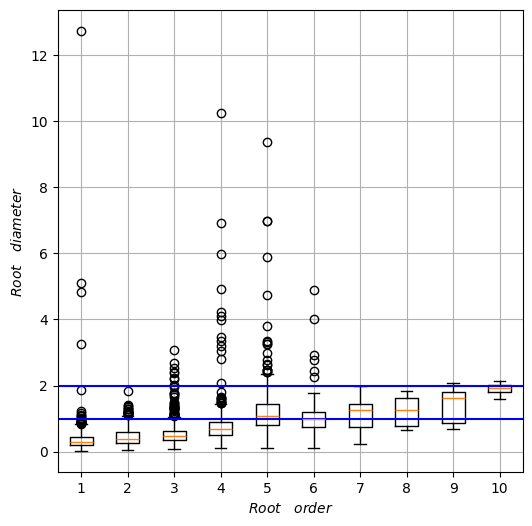

In [3]:
# root order and root diameter

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.boxplot([group.F00679 for (_, group) in fred.loc[:, ["F00679", "F00056"]].dropna().groupby("F00056")], label=[order for (order, _) in fred.loc[:, ["F00679", "F00056"]].dropna().groupby("F00056")])
axes.hlines(y=[1, 2], xmin=axes.get_xlim()[0], xmax=axes.get_xlim()[1], color="blue")
axes.set_ylabel(r"$Root\hspace{1}diameter$")
axes.set_xlabel(r"$Root\hspace{1}order$")
axes.grid()
plt.show()

# fred.loc[:, COLLABORATION_GRADIENT_TRAITS + CONSERVATION_GRADIENT_TRAITS + PLANT_TAXONOMY_ACCEPTED_COLUMNS + ESSENTIAL_COLUMNS].query("F00056.isin((1,2,3))").F00679

In [4]:
# traits relevent to the root economics space (RES)

COLLABORATION_GRADIENT_TRAITS = [
    "F00679", # RD
    "F00727", # SRL
    "F00718", #	Specific root area (SRA)
    "F00104", # RCT
    "F00622", # Mycorrhiza_Fraction root length colonized by AM mycorrhizae
    "F00626", # Mycorrhiza_Fraction root length colonized by EM mycorrhizae
    "F00638", # Mycorrhiza_Fraction of root length
    "F00645"  # Mycorrhiza_Type_Data - not technically a root trait, just a relevant info
]

CONSERVATION_GRADIENT_TRAITS = [
    "F00709", # RTD
    "F00277", #	Root P content
    "F00261", # Root N content
    "F00358"  # Root lignin content
]

PLANT_TAXONOMY_ACCEPTED_COLUMNS = [
    "F01286", # Genus of plant according to The Plant List
    "F01287", # Species epithet of plant according to The Plant List
    "F01289", # Family of plant according to The Plant List
    "F01290" # Order of plant. For Angiosperms, this was determined using the Angiosperm Phylogeny Website (APW): Stevens, P. F. (2001 onwards). Angiosperm Phylogeny Website. 
             # Version 14, July 2017 [and more or less continuously updated since]. Online at http://www.mobot.org/MOBOT/research/APweb/. 
             # For other plant groups (Gymnosperms, Pteridophytes, and Bryophytes) this was determined first using APW, but in cases where there were discrepancies within APW,
             # and to maintain consistency in suffix nomenclature (i.e. all orders ending in “iales”), additional sources were used including the USDA Plants Database 
             # (https://plants.usda.gov/) and the Missouri Botanical Garden (http://www.missouribotanicalgarden.org/plant-science/plant-science/research/plant-identification.aspx).
]

ESSENTIAL_COLUMNS = [
    "F00018", # genus
    "F00019", # species
    "F00056", # root order
    "F00645"  # mycorrhizal type
]

BINOMINAL_NAME = [
    "F00018", # genus name
    "F00019" # specific epithet
]

In [5]:
fred.loc[:, COLLABORATION_GRADIENT_TRAITS + CONSERVATION_GRADIENT_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].isna().mean()

F00679    0.838835
F00727    0.843627
F00718    0.961637
F00104    0.993828
F00622    0.989596
F00626    0.999685
F00638    0.988390
F00645    0.829148
F00709    0.882847
F00277    0.966550
F00261    0.881728
F00358    0.986693
F00018    0.244029
F00019    0.255499
F00056    0.871533
F00645    0.829148
F01286    0.250743
F01287    0.256478
F01289    0.243189
F01290    0.243015
dtype: float64

In [6]:
CHOSEN_RES_TRAITS = [
    "F00679", # RD
    "F00727", # SRL
    "F00261", # RP
    "F00709"  # RTD
]

In [7]:
# subset the dataframe to pick only the columns with least amount of missing values
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS]

F00679    F00727     F00261  F00709          F00018      F00019  \
0         NaN       NaN        NaN     NaN   Dicranopteris   dichotoma   
1         NaN       NaN        NaN     NaN   Dicranopteris   dichotoma   
2         NaN       NaN        NaN     NaN   Dicranopteris   dichotoma   
3         NaN       NaN        NaN     NaN    Cunninghamia  lanceolata   
4         NaN       NaN        NaN     NaN    Cunninghamia  lanceolata   
...       ...       ...        ...     ...             ...         ...   
57185     NaN  0.567694   8.666348     NaN  Diplopterygium    chinense   
57186     NaN  0.693820   8.520457     NaN  Diplopterygium    chinense   
57187     NaN  3.364970  14.188312     NaN         Osmunda    japonica   
57188     NaN  2.174190  14.849199     NaN         Osmunda    japonica   
57189     NaN  1.130744  15.575992     NaN         Osmunda    japonica   

       F00056 F00645          F01286      F01287          F01289  \
0         1.0     AM   Dicranopteris    linearis  Gleicheniaceae   
1         2.0     AM   Dicranopteris    linearis  Gleicheniaceae   
2         3.0     AM   Dicranopteris    linearis  Gleicheniaceae   
3         1.0     AM    Cunninghamia  lanceolata    Cupressaceae   
4         2.0     AM    Cunninghamia  lanceolata    Cupressaceae   
...       ...    ...             ...         ...             ...   
57185     NaN    NaN  Diplopterygium   chinensis  Gleicheniaceae   
57186     NaN    NaN  Diplopterygium   chinensis  Gleicheniaceae   
57187     NaN    NaN         Osmunda    japonica     Osmundaceae   
57188     NaN    NaN         Osmunda    japonica     Osmundaceae   
57189     NaN    NaN         Osmunda    japonica     Osmundaceae   

              F01290  
0      Gleicheniales  
1      Gleicheniales  
2      Gleicheniales  
3            Pinales  
4            Pinales  
...              ...  
57185  Gleicheniales  
57186  Gleicheniales  
57187    Osmundaceae  
57188    Osmundaceae  
57189    Osmundaceae  

[57190 rows x 12 columns]

In [8]:
# get rid of records with missing values for the 4 chosen root traits
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS)

F00679      F00727     F00261    F00709        F00018       F00019  \
302    0.250000   71.600000  19.700000  0.440000           NaN          NaN   
303    0.290000   45.900000  14.900000  0.300000           NaN          NaN   
304    0.380000   68.100000  20.400000  0.320000           NaN          NaN   
382    0.142951  447.167648  18.478265  0.169294       Populus  trichocarpa   
383    0.249630  166.388374  14.456530  0.160036       Populus  trichocarpa   
...         ...         ...        ...       ...           ...          ...   
54941  0.400000   51.410000  16.500000  0.150000        Allium  tenuissimum   
54942  0.490000   31.670000  16.500000  0.170000        Allium   bidentatum   
54943  0.510000   26.060000  16.500000  0.190000        Allium   bidentatum   
54944  0.230000  102.900000  12.200000  0.230000  Chamaerhodos       erecta   
54945  0.240000  108.100000  10.700000  0.210000  Chamaerhodos       erecta   

       F00056 F00645        F01286       F01287          F01289        F01290  
302       1.0    NaN           NaN          NaN             NaN           NaN  
303       1.0    NaN           NaN          NaN             NaN           NaN  
304       1.0    NaN           NaN          NaN             NaN           NaN  
382       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
383       2.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
...       ...    ...           ...          ...             ...           ...  
54941     NaN    NaN        Allium  tenuissimum  Amaryllidaceae   Asparagales  
54942     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54943     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54944     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  
54945     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  

[1356 rows x 12 columns]

In [9]:
# see whether accepted genus source has info where the data source genus name is missing!!
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS).query("F00018.isna()") # nada

F00679      F00727     F00261  F00709 F00018 F00019  F00056 F00645  \
302    0.250000   71.600000  19.700000    0.44    NaN    NaN     1.0    NaN   
303    0.290000   45.900000  14.900000    0.30    NaN    NaN     1.0    NaN   
304    0.380000   68.100000  20.400000    0.32    NaN    NaN     1.0    NaN   
1603   0.510000   30.160000  12.400000    0.27    NaN    NaN     NaN    NaN   
1604   0.490000   35.250000   8.200000    0.28    NaN    NaN     NaN    NaN   
1605   0.510000   32.550000   9.700000    0.27    NaN    NaN     NaN    NaN   
1606   0.510000   31.770000   9.100000    0.27    NaN    NaN     NaN    NaN   
1607   0.490000   34.440000   8.300000    0.29    NaN    NaN     NaN    NaN   
1608   0.490000   27.630000   7.000000    0.32    NaN    NaN     NaN    NaN   
1609   0.490000   33.500000   7.100000    0.33    NaN    NaN     NaN    NaN   
1610   0.350000   38.610000   5.100000    0.37    NaN    NaN     NaN    NaN   
7647   0.420000   16.200000  11.770000    0.47    NaN    NaN     NaN     AM   
7648   0.480000   11.620000  10.010000    0.51    NaN    NaN     NaN     EM   
8318   0.713535   18.860189  16.571923    0.16    NaN    NaN     2.0     AM   
8319   1.158874    5.123380  11.560776    0.26    NaN    NaN     3.0     AM   
14533  0.250000  325.000000  14.000000    0.09    NaN    NaN     NaN    NaN   
14534  0.290000  154.000000  11.400000    0.12    NaN    NaN     NaN    NaN   
14535  0.230000  294.000000   5.800000    0.12    NaN    NaN     NaN    NaN   
14536  0.270000  234.000000  11.900000    0.09    NaN    NaN     NaN    NaN   
14537  0.300000  172.000000  24.100000    0.10    NaN    NaN     NaN    NaN   
14538  0.260000  213.000000  14.100000    0.11    NaN    NaN     NaN    NaN   

      F01286 F01287 F01289 F01290  
302      NaN    NaN    NaN    NaN  
303      NaN    NaN    NaN    NaN  
304      NaN    NaN    NaN    NaN  
1603     NaN    NaN    NaN    NaN  
1604     NaN    NaN    NaN    NaN  
1605     NaN    NaN    NaN    NaN  
1606     NaN    NaN    NaN    NaN  
1607     NaN    NaN    NaN    NaN  
1608     NaN    NaN    NaN    NaN  
1609     NaN    NaN    NaN    NaN  
1610     NaN    NaN    NaN    NaN  
7647     NaN    NaN    NaN    NaN  
7648     NaN    NaN    NaN    NaN  
8318     NaN    NaN    NaN    NaN  
8319     NaN    NaN    NaN    NaN  
14533    NaN    NaN    NaN    NaN  
14534    NaN    NaN    NaN    NaN  
14535    NaN    NaN    NaN    NaN  
14536    NaN    NaN    NaN    NaN  
14537    NaN    NaN    NaN    NaN  
14538    NaN    NaN    NaN    NaN

In [54]:
# drop the rows that do not have a genus name
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018"])

F00679      F00727     F00261    F00709        F00018       F00019  \
382    0.142951  447.167648  18.478265  0.169294       Populus  trichocarpa   
383    0.249630  166.388374  14.456530  0.160036       Populus  trichocarpa   
384    0.425085   60.723679  10.760881  0.171351       Populus  trichocarpa   
385    0.687417   30.725767   9.130448  0.191318       Populus  trichocarpa   
386    0.175513  330.424588  22.065220  0.169294       Populus      tremula   
...         ...         ...        ...       ...           ...          ...   
54941  0.400000   51.410000  16.500000  0.150000        Allium  tenuissimum   
54942  0.490000   31.670000  16.500000  0.170000        Allium   bidentatum   
54943  0.510000   26.060000  16.500000  0.190000        Allium   bidentatum   
54944  0.230000  102.900000  12.200000  0.230000  Chamaerhodos       erecta   
54945  0.240000  108.100000  10.700000  0.210000  Chamaerhodos       erecta   

       F00056 F00645        F01286       F01287          F01289        F01290  
382       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
383       2.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
384       3.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
385       4.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
386       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales  
...       ...    ...           ...          ...             ...           ...  
54941     NaN    NaN        Allium  tenuissimum  Amaryllidaceae   Asparagales  
54942     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54943     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54944     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  
54945     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  

[1335 rows x 12 columns]

In [55]:
# missing values???
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018"]).isna().mean()

F00679    0.000000
F00727    0.000000
F00261    0.000000
F00709    0.000000
F00018    0.000000
F00019    0.009738
F00056    0.435206
F00645    0.501124
F01286    0.000749
F01287    0.009738
F01289    0.014981
F01290    0.014981
dtype: float64

In [12]:
# root order and mycorrhizal type still have lots of NAs

In [57]:
# including root order in NA removal columns
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018", "F00056"])

F00679      F00727     F00261    F00709         F00018       F00019  \
382    0.142951  447.167648  18.478265  0.169294        Populus  trichocarpa   
383    0.249630  166.388374  14.456530  0.160036        Populus  trichocarpa   
384    0.425085   60.723679  10.760881  0.171351        Populus  trichocarpa   
385    0.687417   30.725767   9.130448  0.191318        Populus  trichocarpa   
386    0.175513  330.424588  22.065220  0.169294        Populus      tremula   
...         ...         ...        ...       ...            ...          ...   
45575  0.042154   81.443333  19.366667  0.103333         Prunus    sargentii   
45576  0.219538   20.513333  23.200000  0.116667      Sassafras      albidum   
45577  0.086988   36.817500  26.300000  0.155000  Styphnolobium    japonicum   
45578  0.061422   89.920000  23.900000  0.075000        Syringa   reticulata   
45579  0.076581   71.770000  16.325000  0.077500          Ulmus    americana   

       F00056 F00645         F01286       F01287      F01289        F01290  
382       1.0    NaN        Populus  trichocarpa  Salicaceae  Malpighiales  
383       2.0    NaN        Populus  trichocarpa  Salicaceae  Malpighiales  
384       3.0    NaN        Populus  trichocarpa  Salicaceae  Malpighiales  
385       4.0    NaN        Populus  trichocarpa  Salicaceae  Malpighiales  
386       1.0    NaN        Populus      tremula  Salicaceae  Malpighiales  
...       ...    ...            ...          ...         ...           ...  
45575     1.0    NaN         Prunus    sargentii    Rosaceae       Rosales  
45576     1.0    NaN      Sassafras      albidum   Lauraceae      Laurales  
45577     1.0    NaN  Styphnolobium    japonicum    Fabaceae       Fabales  
45578     1.0    NaN        Syringa   reticulata    Oleaceae      Lamiales  
45579     1.0    NaN          Ulmus    americana    Ulmaceae       Rosales  

[754 rows x 12 columns]

In [14]:
# including mycorrhizal type in NA removal columns
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018", "F00645"])

F00679     F00727  F00261    F00709       F00018      F00019  F00056  \
1553   0.3100  23.800000   13.01  0.550000  Aristotelia     serrata     NaN   
1554   0.5300  22.200000    9.01  0.200000     Ascarina      lucida     NaN   
1555   0.4300  31.800000   16.18  0.200000    Asplenium  bulbiferum     NaN   
1556   0.9400  12.900000   10.12  0.090000      Astelia    fragrans     NaN   
1557   0.9500  14.500000    6.49  0.090000      Astelia     nervosa     NaN   
...       ...        ...     ...       ...          ...         ...     ...   
42456  0.3641  55.618299    9.80  0.172743   Weinmannia   silvicola     NaN   
42457  0.3474  65.650773    9.80  0.160465   Weinmannia   silvicola     NaN   
42458  0.4144  38.274731    9.80  0.193932   Weinmannia   silvicola     NaN   
42459  0.3619  61.581617    9.80  0.157944   Weinmannia   silvicola     NaN   
42460  0.3820  42.031775    9.80  0.207937   Weinmannia   silvicola     NaN   

      F00645       F01286      F01287          F01289         F01290  
1553      AM  Aristotelia     serrata  Elaeocarpaceae     Oxalidales  
1554      AM     Ascarina      lucida  Chloranthaceae  Chloranthales  
1555      AM    Asplenium  bulbiferum    Aspleniaceae   Polypodiales  
1556      AM      Astelia    fragrans     Asteliaceae    Asparagales  
1557      AM      Astelia     nervosa     Asteliaceae    Asparagales  
...      ...          ...         ...             ...            ...  
42456     AM   Weinmannia   silvicola     Cunoniaceae     Oxalidales  
42457     AM   Weinmannia   silvicola     Cunoniaceae     Oxalidales  
42458     AM   Weinmannia   silvicola     Cunoniaceae     Oxalidales  
42459     AM   Weinmannia   silvicola     Cunoniaceae     Oxalidales  
42460     AM   Weinmannia   silvicola     Cunoniaceae     Oxalidales  

[666 rows x 12 columns]

In [15]:
# including root order and mycorrhizal type in NA removal columns
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018", "F00056", "F00645"])

F00679     F00727     F00261    F00709     F00018          F00019  \
7575   0.373683  32.822980  17.884615  0.370787   Fraxinus       excelsior   
7578   0.477964  16.411514  15.576925  0.286517   Fraxinus       excelsior   
7581   0.704767   6.028751  13.461542  0.320225   Fraxinus       excelsior   
7584   1.084639   3.684259  12.211543  0.353933   Fraxinus       excelsior   
7587   0.266508  62.631585  14.230772  0.380899       Acer  pseudoplatanus   
...         ...        ...        ...       ...        ...             ...   
24549  0.283178  55.472897  17.700000  0.286228       Acer       truncatum   
24550  0.345455  48.454545  15.000000  0.220188       Acer       truncatum   
24551  0.471667  16.750000  12.300000  0.341684       Acer       truncatum   
24552  0.782500   7.882690  11.100000  0.263795       Acer       truncatum   
24553  0.305000  46.556000  14.600000  0.294000  Rhodoleia      championii   

       F00056   F00645     F01286          F01287          F01289  \
7575      1.0       AM   Fraxinus       excelsior        Oleaceae   
7578      2.0       AM   Fraxinus       excelsior        Oleaceae   
7581      3.0       AM   Fraxinus       excelsior        Oleaceae   
7584      4.0       AM   Fraxinus       excelsior        Oleaceae   
7587      1.0       AM       Acer  pseudoplatanus     Sapindaceae   
...       ...      ...        ...             ...             ...   
24549     2.0  AM + EM       Acer       truncatum     Sapindaceae   
24550     3.0  AM + EM       Acer       truncatum     Sapindaceae   
24551     4.0  AM + EM       Acer       truncatum     Sapindaceae   
24552     5.0  AM + EM       Acer       truncatum     Sapindaceae   
24553     1.0       AM  Rhodoleia      championii  Hamamelidaceae   

             F01290  
7575       Lamiales  
7578       Lamiales  
7581       Lamiales  
7584       Lamiales  
7587     Sapindales  
...             ...  
24549    Sapindales  
24550    Sapindales  
24551    Sapindales  
24552    Sapindales  
24553  Saxifragales  

[482 rows x 12 columns]

In [59]:
# what is the root diameter distribution of fine roots (orders 1, 2, 3)

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.boxplot([group.F00679 for (_, group) in fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018"]).\
                                                    query("F00056.isin((1, 2, 3))").groupby("F00056")])
axes.hlines(y=[1, 2], xmin=axes.get_xlim()[0], xmax=axes.get_xlim()[1], color="blue")
axes.set_ylabel(r"$Root\hspace{1}diameter$")
axes.set_xlabel(r"$Root\hspace{1}order$")
axes.grid()
plt.show()

In [58]:
# if available in literature, mycorrhizal type can be manually added so do not prioritize that for now
# when root order is missing include the record only if the root diamater is less than 1 mm

fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018"]).\
                                                    query("(F00056.isin((1, 2, 3)) and (F00056 < 2.00))")# or (F00056.isna() and (F00679 < 1.000))")

F00679      F00727     F00261    F00709         F00018       F00019  \
382    0.142951  447.167648  18.478265  0.169294        Populus  trichocarpa   
386    0.175513  330.424588  22.065220  0.169294        Populus      tremula   
390    0.184985  328.596138  24.324159  0.149141        Populus      tremula   
394    0.168168  328.600675  18.089277  0.199656        Populus      tremula   
398    0.142944  321.823692  19.851313  0.224914        Populus  trichocarpa   
...         ...         ...        ...       ...            ...          ...   
45575  0.042154   81.443333  19.366667  0.103333         Prunus    sargentii   
45576  0.219538   20.513333  23.200000  0.116667      Sassafras      albidum   
45577  0.086988   36.817500  26.300000  0.155000  Styphnolobium    japonicum   
45578  0.061422   89.920000  23.900000  0.075000        Syringa   reticulata   
45579  0.076581   71.770000  16.325000  0.077500          Ulmus    americana   

       F00056 F00645         F01286       F01287      F01289        F01290  
382       1.0    NaN        Populus  trichocarpa  Salicaceae  Malpighiales  
386       1.0    NaN        Populus      tremula  Salicaceae  Malpighiales  
390       1.0    NaN        Populus      tremula  Salicaceae  Malpighiales  
394       1.0    NaN        Populus      tremula  Salicaceae  Malpighiales  
398       1.0    NaN        Populus  trichocarpa  Salicaceae  Malpighiales  
...       ...    ...            ...          ...         ...           ...  
45575     1.0    NaN         Prunus    sargentii    Rosaceae       Rosales  
45576     1.0    NaN      Sassafras      albidum   Lauraceae      Laurales  
45577     1.0    NaN  Styphnolobium    japonicum    Fabaceae       Fabales  
45578     1.0    NaN        Syringa   reticulata    Oleaceae      Lamiales  
45579     1.0    NaN          Ulmus    americana    Ulmaceae       Rosales  

[294 rows x 12 columns]

In [17]:
# missing values???
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + ["F00018"]).\
                        query("(F00056.isin((1, 2, 3)) and (F00056 < 2.00)) or (F00056.isna() and (F00679 < 1.000))").isna().mean()

F00679    0.000000
F00727    0.000000
F00261    0.000000
F00709    0.000000
F00018    0.000000
F00019    0.017735
F00056    0.598909
F00645    0.491132
F01286    0.001364
F01287    0.017735
F01289    0.013643
F01290    0.013643
dtype: float64

In [52]:
# why not consider specific epithet for the NA removal???
fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + BINOMINAL_NAME)
                            # query("(F00056.isin((1, 2, 3)) and (F00056 < 2.00))")# or (F00056.isna() and (F00679 < 1.000))")

F00679      F00727     F00261    F00709        F00018       F00019  \
382    0.142951  447.167648  18.478265  0.169294       Populus  trichocarpa   
383    0.249630  166.388374  14.456530  0.160036       Populus  trichocarpa   
384    0.425085   60.723679  10.760881  0.171351       Populus  trichocarpa   
385    0.687417   30.725767   9.130448  0.191318       Populus  trichocarpa   
386    0.175513  330.424588  22.065220  0.169294       Populus      tremula   
...         ...         ...        ...       ...           ...          ...   
54941  0.400000   51.410000  16.500000  0.150000        Allium  tenuissimum   
54942  0.490000   31.670000  16.500000  0.170000        Allium   bidentatum   
54943  0.510000   26.060000  16.500000  0.190000        Allium   bidentatum   
54944  0.230000  102.900000  12.200000  0.230000  Chamaerhodos       erecta   
54945  0.240000  108.100000  10.700000  0.210000  Chamaerhodos       erecta   

       F00056 F00645        F01286       F01287          F01289        F01290  
382       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
383       2.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
384       3.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
385       4.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
386       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales  
...       ...    ...           ...          ...             ...           ...  
54941     NaN    NaN        Allium  tenuissimum  Amaryllidaceae   Asparagales  
54942     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54943     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54944     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  
54945     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  

[1322 rows x 12 columns]

In [32]:
# in our subset fine roots means roots that are less than 2 mm in diameter AND of orders 1, 2 or 3 OR roots with diameter less than 1 mm (being more stringent here because the order is unknown)
# settling for the current subset
data = fred.loc[:, CHOSEN_RES_TRAITS + ESSENTIAL_COLUMNS + PLANT_TAXONOMY_ACCEPTED_COLUMNS].dropna(subset=CHOSEN_RES_TRAITS + BINOMINAL_NAME).\
                        query("(F00056.isin((1, 2, 3)) and (F00056 < 2.00)) or (F00056.isna() and (F00679 < 1.000))")

In [33]:
data

F00679      F00727     F00261    F00709        F00018       F00019  \
382    0.142951  447.167648  18.478265  0.169294       Populus  trichocarpa   
386    0.175513  330.424588  22.065220  0.169294       Populus      tremula   
390    0.184985  328.596138  24.324159  0.149141       Populus      tremula   
394    0.168168  328.600675  18.089277  0.199656       Populus      tremula   
398    0.142944  321.823692  19.851313  0.224914       Populus  trichocarpa   
...         ...         ...        ...       ...           ...          ...   
54941  0.400000   51.410000  16.500000  0.150000        Allium  tenuissimum   
54942  0.490000   31.670000  16.500000  0.170000        Allium   bidentatum   
54943  0.510000   26.060000  16.500000  0.190000        Allium   bidentatum   
54944  0.230000  102.900000  12.200000  0.230000  Chamaerhodos       erecta   
54945  0.240000  108.100000  10.700000  0.210000  Chamaerhodos       erecta   

       F00056 F00645        F01286       F01287          F01289        F01290  
382       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
386       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales  
390       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales  
394       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales  
398       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales  
...       ...    ...           ...          ...             ...           ...  
54941     NaN    NaN        Allium  tenuissimum  Amaryllidaceae   Asparagales  
54942     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54943     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales  
54944     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  
54945     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales  

[720 rows x 12 columns]

In [34]:
data.F00056.isna().mean(), (data.F00679 < 1.000).mean()

(np.float64(0.5916666666666667), np.float64(0.9930555555555556))

In [35]:
data.isna().mean()

F00679    0.000000
F00727    0.000000
F00261    0.000000
F00709    0.000000
F00018    0.000000
F00019    0.000000
F00056    0.591667
F00645    0.483333
F01286    0.000000
F01287    0.000000
F01289    0.013889
F01290    0.013889
dtype: float64

In [36]:
# taxonomic corrections
lookup.loc[data.F00018]

KeyError: "['Parakmeria', 'Paramichelia', 'Aporusa', 'Tsoongiodendron', 'Fuscospora', 'Lophozonia', 'Prinostemma', 'Paragonia'] not in index"

In [37]:
# see the binominal names of the missing keys
data.query("F00018.isin(['Parakmeria', 'Paramichelia', 'Aporusa', 'Tsoongiodendron', 'Fuscospora', 'Lophozonia', 'Prinostemma', 'Paragonia'])")

F00679      F00727     F00261    F00709           F00018  \
9666   0.720740   17.240000  18.450000  0.210000       Parakmeria   
9667   0.696850   12.010000  21.260000  0.240000       Parakmeria   
9679   0.575000   19.330000  18.790000  0.270000     Paramichelia   
9709   0.366620   29.150000  20.920000  0.340000          Aporusa   
9711   0.258820   49.730000  19.070000  0.360000          Aporusa   
24398  0.591000   18.500000  27.300000  0.197000  Tsoongiodendron   
24875  0.574500   19.330000  25.263170  0.280000     Paramichelia   
27203  0.290000   78.000000  17.300000  0.240000       Fuscospora   
27204  0.310000   55.300000  17.600000  0.270000       Fuscospora   
27205  0.240000  103.800000  14.500000  0.240000       Fuscospora   
27206  0.280000   65.800000  11.000000  0.300000       Fuscospora   
27213  0.360000   35.400000  17.100000  0.310000       Lophozonia   
34897  0.702958   11.030816  12.184530  0.233703      Prinostemma   
34898  0.572695   16.663233  15.540150  0.233090      Prinostemma   
34899  0.691485   12.776788  15.554085  0.208518      Prinostemma   
34900  0.698873   11.737165  13.971442  0.222213      Prinostemma   
34901  0.791009    9.218728  12.377460  0.220849      Prinostemma   
34902  0.666245   12.928493  17.329771  0.221980      Prinostemma   
34903  0.604395   14.016306  13.782352  0.248803      Prinostemma   
34904  0.608691   16.277075  14.902076  0.211232      Prinostemma   
34905  0.636979   13.212018  13.338739  0.237635      Prinostemma   
34906  0.964184    6.851420  12.626471  0.200000      Prinostemma   
34917  0.633141   21.732194  18.859655  0.146226        Paragonia   
34918  0.725343   18.438289  21.864370  0.131317        Paragonia   
34919  0.668050   19.564744  18.859655  0.145894        Paragonia   
34920  0.796236   15.596748  19.324485  0.128829        Paragonia   
34921  0.590554   30.535016  21.946801  0.119623        Paragonia   
34922  0.879964    9.952166  18.747720  0.165304        Paragonia   
34923  0.764290   17.664417  19.324485  0.123457        Paragonia   
34924  0.563998   29.454258  22.316286  0.135965        Paragonia   
34925  0.641343   17.813434  17.981177  0.173861        Paragonia   
34926  0.877715   13.399898  22.975424  0.123402        Paragonia   

               F00019  F00056 F00645       F01286       F01287  \
9666      yunnanensis     1.0     AM     Magnolia  yunnanensis   
9667      lotungensis     1.0     AM     Magnolia  lotungensis   
9679        baillonii     1.0     AM     Magnolia    baillonii   
9709           dioica     1.0     AM      Aporosa     octandra   
9711      yunnanensis     1.0     AM      Aporosa  yunnanensis   
24398          odorum     1.0     AM     Magnolia        odora   
24875       baillonii     1.0    NaN     Magnolia    baillonii   
27203  cliffortioides     NaN     EM   Nothofagus     solandri   
27204           fusca     NaN     EM   Nothofagus        fusca   
27205        solandri     NaN     EM   Nothofagus     solandri   
27206        truncata     NaN     EM   Nothofagus        fusca   
27213       menziesii     NaN     EM   Nothofagus      obliqua   
34897          aspera     NaN    NaN  Prinostemma       aspera   
34898          aspera     NaN    NaN  Prinostemma       aspera   
34899          aspera     NaN    NaN  Prinostemma       aspera   
34900          aspera     NaN    NaN  Prinostemma       aspera   
34901          aspera     NaN    NaN  Prinostemma       aspera   
34902          aspera     NaN    NaN  Prinostemma       aspera   
34903          aspera     NaN    NaN  Prinostemma       aspera   
34904          aspera     NaN    NaN  Prinostemma       aspera   
34905          aspera     NaN    NaN  Prinostemma       aspera   
34906          aspera     NaN    NaN  Prinostemma       aspera   
34917      pyramidata     NaN    NaN    Tanaecium  pyramidatum   
34918      pyramidata     NaN    NaN    Tanaecium  pyramidatum   
34919      pyramidata     NaN    NaN    Tanaecium  pyramidatum   
34920      pyra

In [38]:
# try looking up using the accepted genus name instead of the data source???
lookup.loc[data.F01286]

KeyError: "['Prinostemma'] not in index"

In [39]:
data.query("F00018==\"Prinostemma\"") # the correct name is Prionostemma aspera

F00679     F00727     F00261    F00709       F00018  F00019  F00056  \
34897  0.702958  11.030816  12.184530  0.233703  Prinostemma  aspera     NaN   
34898  0.572695  16.663233  15.540150  0.233090  Prinostemma  aspera     NaN   
34899  0.691485  12.776788  15.554085  0.208518  Prinostemma  aspera     NaN   
34900  0.698873  11.737165  13.971442  0.222213  Prinostemma  aspera     NaN   
34901  0.791009   9.218728  12.377460  0.220849  Prinostemma  aspera     NaN   
34902  0.666245  12.928493  17.329771  0.221980  Prinostemma  aspera     NaN   
34903  0.604395  14.016306  13.782352  0.248803  Prinostemma  aspera     NaN   
34904  0.608691  16.277075  14.902076  0.211232  Prinostemma  aspera     NaN   
34905  0.636979  13.212018  13.338739  0.237635  Prinostemma  aspera     NaN   
34906  0.964184   6.851420  12.626471  0.200000  Prinostemma  aspera     NaN   

      F00645       F01286  F01287 F01289 F01290  
34897    NaN  Prinostemma  aspera    NaN    NaN  
34898    NaN  Prinostemma  aspera    NaN    NaN  
34899    NaN  Prinostemma  aspera    NaN    NaN  
34900    NaN  Prinostemma  aspera    NaN    NaN  
34901    NaN  Prinostemma  aspera    NaN    NaN  
34902    NaN  Prinostemma  aspera    NaN    NaN  
34903    NaN  Prinostemma  aspera    NaN    NaN  
34904    NaN  Prinostemma  aspera    NaN    NaN  
34905    NaN  Prinostemma  aspera    NaN    NaN  
34906    NaN  Prinostemma  aspera    NaN    NaN

In [40]:
# correct that name in data
data.F01286 = data.F01286.replace({"Prinostemma": "Prionostemma"})

In [41]:
lookup.loc[data.F01286]

family         order        group
genus                                                  
Populus           Salicaceae  Malpighiales  Angiosperms
Populus           Salicaceae  Malpighiales  Angiosperms
Populus           Salicaceae  Malpighiales  Angiosperms
Populus           Salicaceae  Malpighiales  Angiosperms
Populus           Salicaceae  Malpighiales  Angiosperms
...                      ...           ...          ...
Allium        Amaryllidaceae   Asparagales  Angiosperms
Allium        Amaryllidaceae   Asparagales  Angiosperms
Allium        Amaryllidaceae   Asparagales  Angiosperms
Chamaerhodos        Rosaceae       Rosales  Angiosperms
Chamaerhodos        Rosaceae       Rosales  Angiosperms

[720 rows x 3 columns]

In [43]:
# we do have missing values in the taxonomy columns
data.isna().mean()

F00679    0.000000
F00727    0.000000
F00261    0.000000
F00709    0.000000
F00018    0.000000
F00019    0.000000
F00056    0.591667
F00645    0.483333
F01286    0.000000
F01287    0.000000
F01289    0.013889
F01290    0.013889
dtype: float64

In [46]:
data = pd.merge(left=data, right=lookup, left_on="F01286", right_index=True)
data

F00679      F00727     F00261    F00709        F00018       F00019  \
382    0.142951  447.167648  18.478265  0.169294       Populus  trichocarpa   
386    0.175513  330.424588  22.065220  0.169294       Populus      tremula   
390    0.184985  328.596138  24.324159  0.149141       Populus      tremula   
394    0.168168  328.600675  18.089277  0.199656       Populus      tremula   
398    0.142944  321.823692  19.851313  0.224914       Populus  trichocarpa   
...         ...         ...        ...       ...           ...          ...   
54941  0.400000   51.410000  16.500000  0.150000        Allium  tenuissimum   
54942  0.490000   31.670000  16.500000  0.170000        Allium   bidentatum   
54943  0.510000   26.060000  16.500000  0.190000        Allium   bidentatum   
54944  0.230000  102.900000  12.200000  0.230000  Chamaerhodos       erecta   
54945  0.240000  108.100000  10.700000  0.210000  Chamaerhodos       erecta   

       F00056 F00645        F01286       F01287          F01289        F01290  \
382       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales   
386       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales   
390       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales   
394       1.0    NaN       Populus      tremula      Salicaceae  Malpighiales   
398       1.0    NaN       Populus  trichocarpa      Salicaceae  Malpighiales   
...       ...    ...           ...          ...             ...           ...   
54941     NaN    NaN        Allium  tenuissimum  Amaryllidaceae   Asparagales   
54942     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales   
54943     NaN    NaN        Allium   bidentatum  Amaryllidaceae   Asparagales   
54944     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales   
54945     NaN    NaN  Chamaerhodos       erecta        Rosaceae       Rosales   

               family         order        group  
382        Salicaceae  Malpighiales  Angiosperms  
386        Salicaceae  Malpighiales  Angiosperms  
390        Salicaceae  Malpighiales  Angiosperms  
394        Salicaceae  Malpighiales  Angiosperms  
398        Salicaceae  Malpighiales  Angiosperms  
...               ...           ...          ...  
54941  Amaryllidaceae   Asparagales  Angiosperms  
54942  Amaryllidaceae   Asparagales  Angiosperms  
54943  Amaryllidaceae   Asparagales  Angiosperms  
54944        Rosaceae       Rosales  Angiosperms  
54945        Rosaceae       Rosales  Angiosperms  

[720 rows x 15 columns]

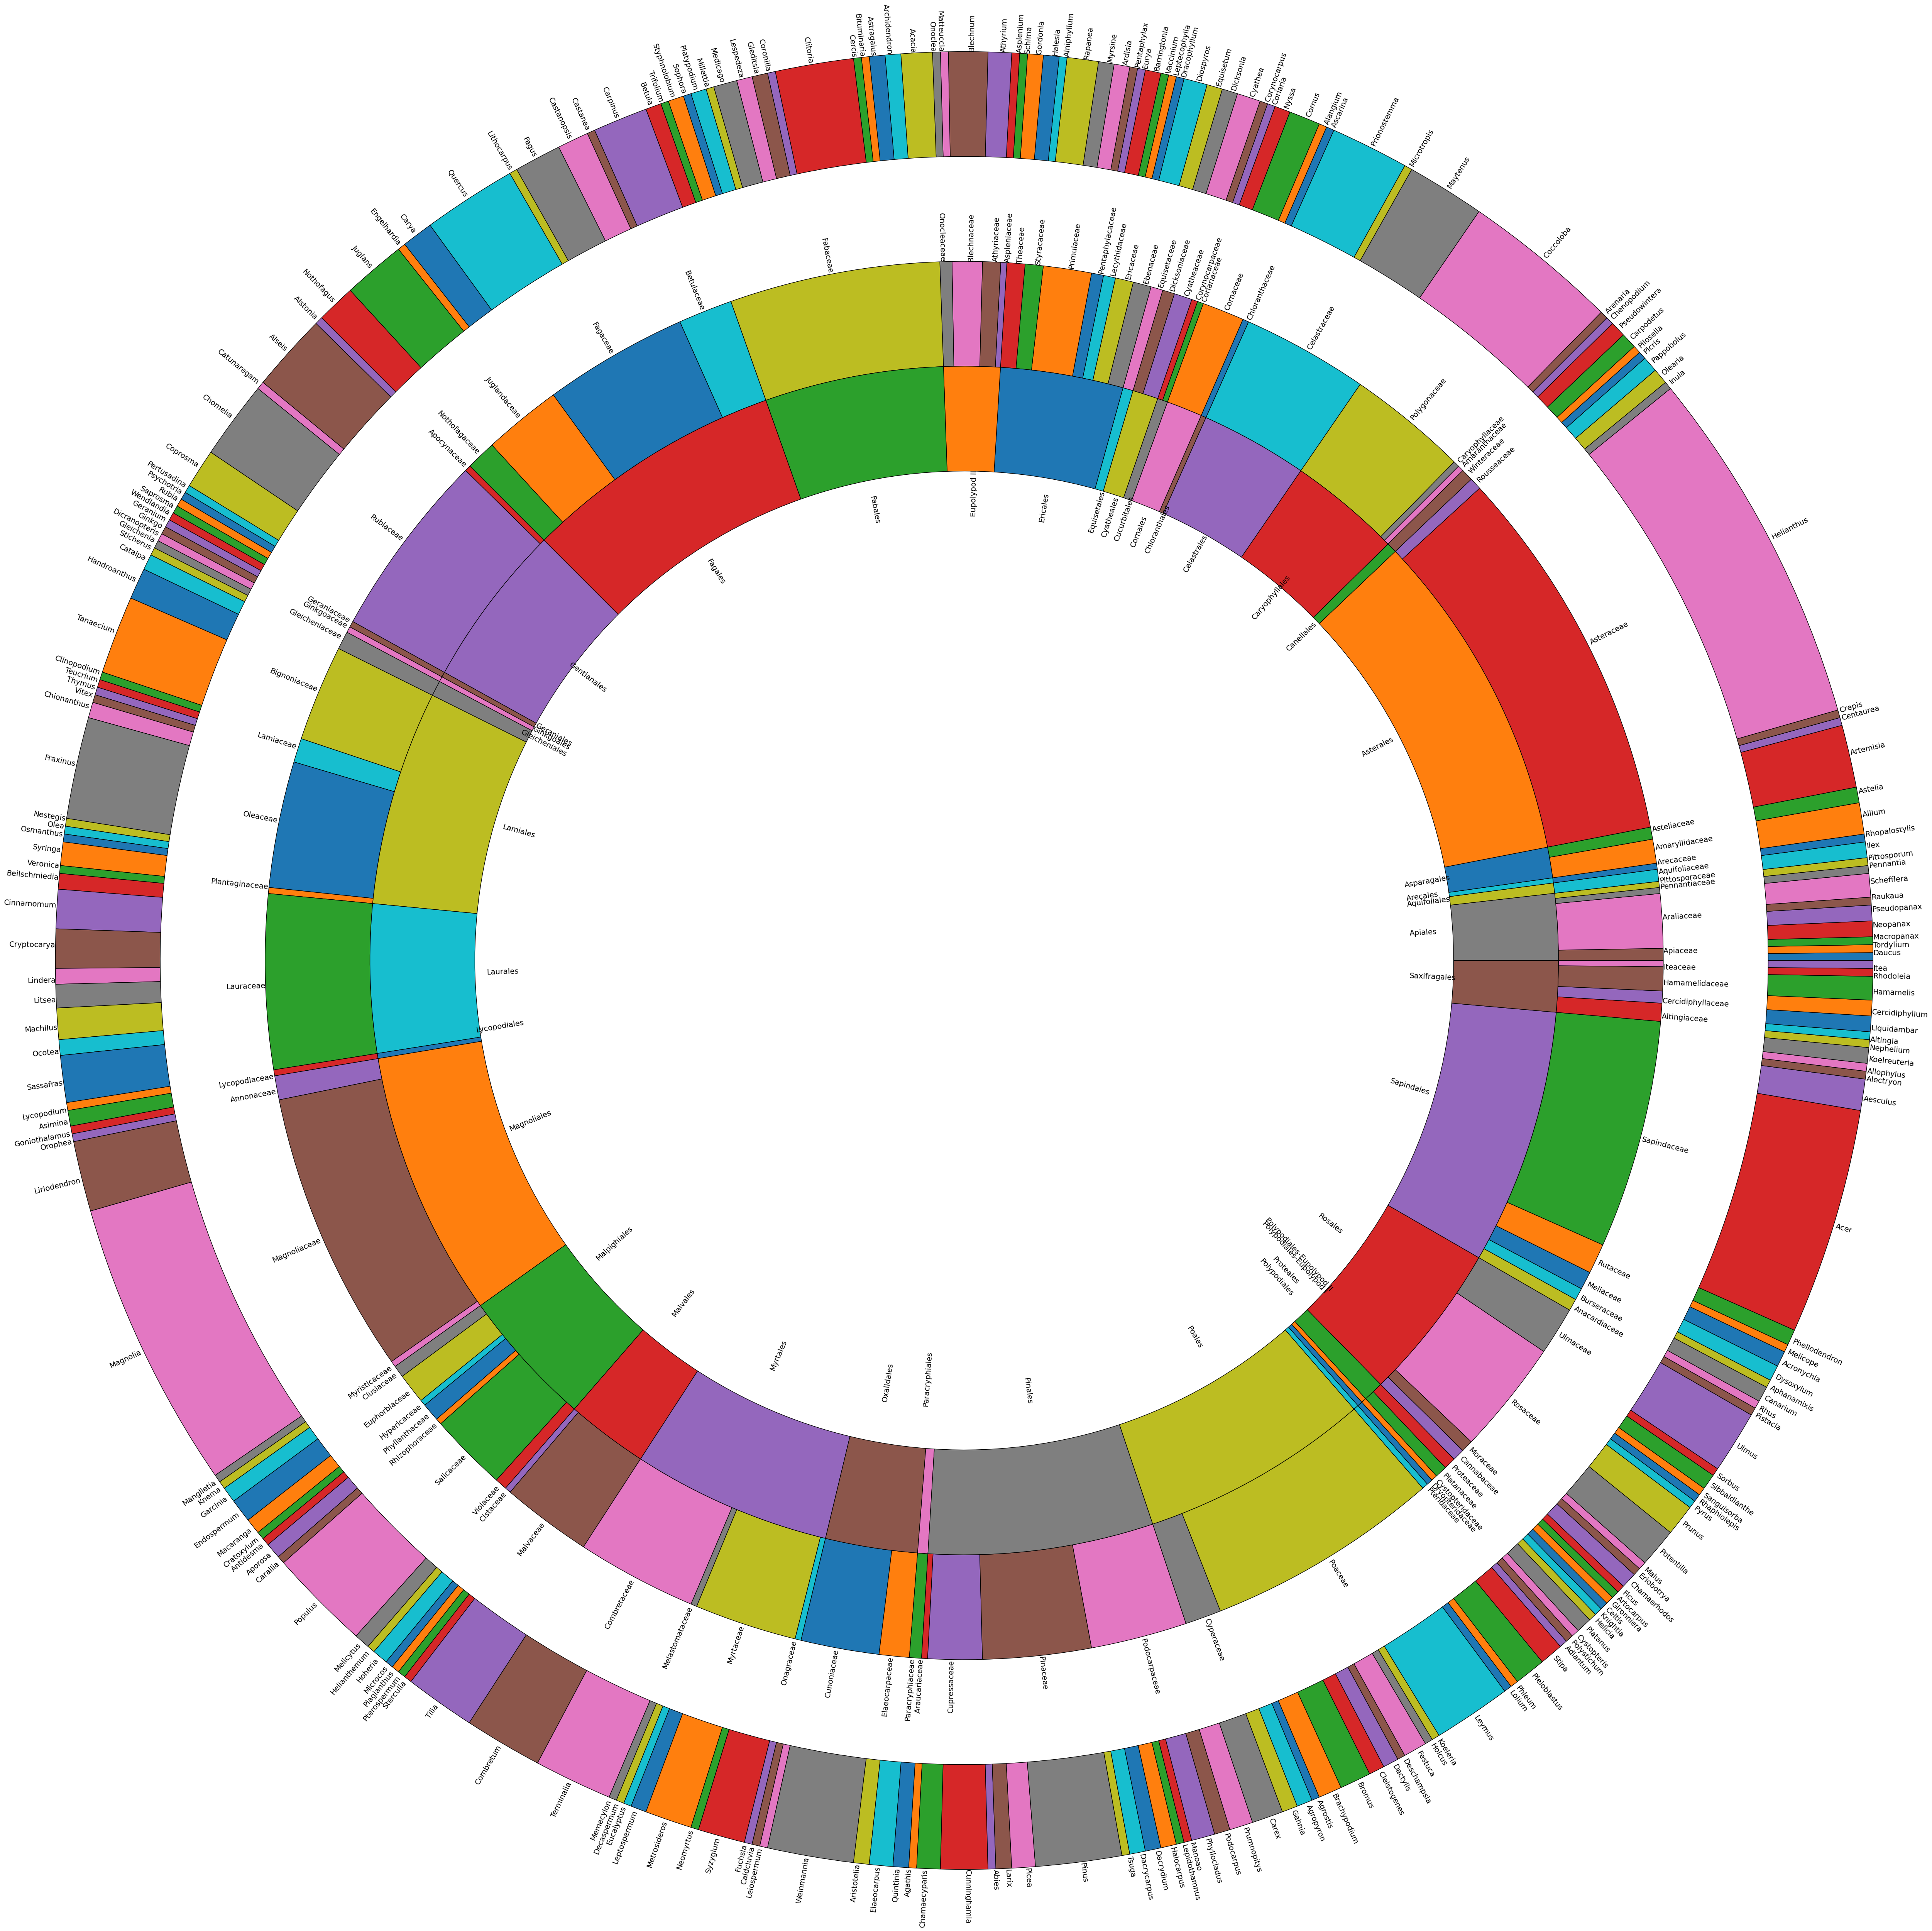

In [49]:
fig, axes = plt.subplots()
fig.set_size_inches(50, 50)
plt.rcParams["font.size"] = 14

RADIUS = 1.00
WIDTH = 0.15
WEDGEPROPERTIES = {
    "width": WIDTH,
    "edgecolor": "black"
}

taxonomically_sorted_data = data.sort_values(["order", "family", "F01286"])

# accepted genera
axes.pie(x=taxonomically_sorted_data.F01286.value_counts(sort=False).values,
         labels=taxonomically_sorted_data.F01286.value_counts(sort=False).index, # autopct='%1.2f%%', pctdistance=0.5,
         labeldistance=1.0, radius=RADIUS+2*WIDTH, wedgeprops=WEDGEPROPERTIES, rotatelabels=True,
         startangle=0
        )

# family
axes.pie(x=taxonomically_sorted_data.family.value_counts(sort=False).values,
         labels=taxonomically_sorted_data.family.value_counts(sort=False).index, # autopct='%1.2f%%', pctdistance=0.5,
         labeldistance=1.0, radius=RADIUS, wedgeprops=WEDGEPROPERTIES, rotatelabels=True,
         startangle=0
        )

# order
axes.pie(x=taxonomically_sorted_data.order.value_counts(sort=False).values,
         labels=taxonomically_sorted_data.order.value_counts(sort=False).index, # autopct='%1.2f%%', pctdistance=0.5,
         labeldistance=0.75, radius=RADIUS-WIDTH, wedgeprops=WEDGEPROPERTIES, rotatelabels=True,
         startangle=0, textprops={"va":"baseline"}
        )

axes.set_aspect("equal")
plt.tight_layout()
plt.show()

In [50]:
data.isna().mean()

F00679    0.000000
F00727    0.000000
F00261    0.000000
F00709    0.000000
F00018    0.000000
F00019    0.000000
F00056    0.591667
F00645    0.483333
F01286    0.000000
F01287    0.000000
F01289    0.013889
F01290    0.013889
family    0.000000
order     0.000000
group     0.000000
dtype: float64